In [101]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot as plt


from pathlib import Path

# Data Processing

In [51]:
# Loading data
file_path = Path("owid-covid-data.csv")
df = pd.read_csv(file_path)
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [77]:
# Selecting specific columns using loc() method
selection = df.loc[:164946,['date','location','icu_patients_per_million','new_deaths','new_vaccinations_smoothed_per_million']]
selection.head()

,date,location,icu_patients_per_million,new_deaths,new_vaccinations_smoothed_per_million
0,2020-02-24,Afghanistan,NaN,NaN,NaN
1,2020-02-25,Afghanistan,NaN,NaN,NaN
2,2020-02-26,Afghanistan,NaN,NaN,NaN
3,2020-02-27,Afghanistan,NaN,NaN,NaN
4,2020-02-28,Afghanistan,NaN,NaN,NaN


In [78]:
# looking at info on our selected columns
selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164945 entries, 0 to 164944
Data columns (total 5 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   date                                   164945 non-null  object 
 1   location                               164945 non-null  object 
 2   icu_patients_per_million               23235 non-null   float64
 3   new_deaths                             144272 non-null  float64
 4   new_vaccinations_smoothed_per_million  83406 non-null   float64
dtypes: float64(3), object(2)
memory usage: 6.3+ MB


In [79]:
# checking for nulls
selection.isnull().sum()

date                                          0
location                                      0
icu_patients_per_million                 141710
new_deaths                                20673
new_vaccinations_smoothed_per_million     81539
dtype: int64

In [80]:
# dropping nulls
clean_selection = selection.dropna()

In [81]:
# double checking there are no nulls after drop
clean_selection.isnull().sum()

date                                     0
location                                 0
icu_patients_per_million                 0
new_deaths                               0
new_vaccinations_smoothed_per_million    0
dtype: int64

In [82]:
# looking for duplicates
print(f'Duplicate entries: {clean_selection.duplicated().sum()}')

Duplicate entries: 0


In [83]:
# checking the dataframe as a whole
clean_selection.head()

,date,location,icu_patients_per_million,new_deaths,new_vaccinations_smoothed_per_million
2555,2021-01-30,Algeria,0.740,4.0,1.0
2557,2021-02-01,Algeria,0.650,3.0,56.0
2558,2021-02-02,Algeria,0.516,4.0,63.0
2561,2021-02-05,Algeria,0.471,5.0,72.0
2564,2021-02-08,Algeria,0.560,4.0,84.0


In [84]:
# checking info on rows and columns of new dataframe
clean_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14230 entries, 2555 to 156684
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date                                   14230 non-null  object 
 1   location                               14230 non-null  object 
 2   icu_patients_per_million               14230 non-null  float64
 3   new_deaths                             14230 non-null  float64
 4   new_vaccinations_smoothed_per_million  14230 non-null  float64
dtypes: float64(3), object(2)
memory usage: 667.0+ KB


In [85]:
# saving the dataframe as a csv
output_file_path= "clean_selected_covid_data.csv"
clean_selection.to_csv(output_file_path, index=False)

# Plotting Cleaned Data

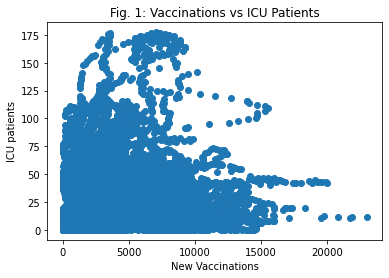

In [94]:
# plotting our data to look at linear realtionship 
plt.scatter(clean_selection.new_vaccinations_smoothed_per_million, clean_selection.icu_patients_per_million)
plt.xlabel('New Vaccinations')
plt.ylabel('ICU_patients')
plt.title('Figure. 1: Vaccinations vs ICU Patients')
plt.show()

In the graph above, we assume new vaccinations is the independent variable and the number of ICU patients recorded is dependent upon vaccination of the population

In [95]:
# preparing the data to meet scikit-learn library requirements
X = clean_selection.new_vaccinations_smoothed_per_million.values.reshape(-1, 1)

In [97]:
# examine first 5 entries of X
X[:5]

array([[ 1.],
       [56.],
       [63.],
       [72.],
       [84.]])

In [98]:
# examine shape of X, aka how many rows and columns
X.shape

(14230, 1)

In [99]:
# assign target variable to y
y = clean_selection.icu_patients_per_million

In [100]:
y.shape

(14230,)

(14230,)


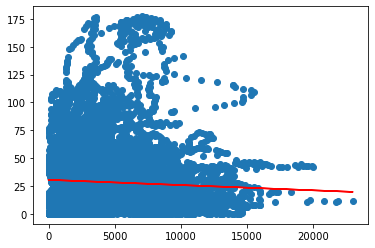

In [104]:
# linear regression model using scikit
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [103]:
print(model.coef_)
print(model.intercept_)

[-0.00047023]
30.57783953149005
